<a href="https://colab.research.google.com/github/carlos-alves-one/-MSc-Data-Science-AI-Thesis/blob/main/historical_weather_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Goldsmiths University of London
### MSc. Data Science and Artificial Intelligence
### Module: Final Project in Data Science (2023-2024)
### Author: Carlos Manuel De Oliveira Alves
### Student: cdeol003

**Description:** This script performs data analysis and LSTM on historical weather data for solar energy forecasting.

> This script imports the time module, records the script's start time, and prints a formatted timestamp indicating when the script began execution.

In [ ]:
import time

start_time = time.time()
start_time_str = time.strftime('%Y-%m-%d %H:%M:%S')
print(f"Script started at: {start_time_str}")


Script started at: 2024-08-23 11:52:30


# Data Collection and Description

## 1. Load the Data
   - Connect to Google Drive to access the dataset
   - Load the data from the provided CSV file.

In [ ]:
# Imports the 'drive' module from 'google.colab' and mounts the Google Drive to
# the '/content/drive' directory in the Colab environment.
from google.colab import drive

# This function mounts Google Drive
def mount_google_drive():
    drive.mount('/content/drive')

# Call the function to mount Google Drive
mount_google_drive()

# Import the pandas library and give it the alias 'pd' for data manipulation and analysis
import pandas as pd

# Load the dataset Amazon Review Details from Google Drive
data_path = '/content/drive/MyDrive/big_data_project/historical_weather.csv'
data = pd.read_csv(data_path)

# Display the first few rows of the dataframe
data.head(5).T


Mounted at /content/drive


0                    1  \
datetime                2021-09-01 00:00:00  2021-09-01 00:00:00   
temperature                            14.2                 13.9   
dewpoint                               11.6                 11.5   
rain                                    0.0                  0.0   
snowfall                                0.0                  0.0   
surface_pressure                     1015.9               1010.7   
cloudcover_total                         31                   33   
cloudcover_low                           31                   37   
cloudcover_mid                            0                    0   
cloudcover_high                          11                    0   
windspeed_10m                      7.083333             5.111111   
winddirection_10m                         8                  359   
shortwave_radiation                     0.0                  0.0   
direct_solar_radiation                  0.0                  0.0   
diffuse_radiation                       0.0                  0.0   
latitude                               57.6                 57.6   
longitude                              21.7                 22.2   
data_block_id                           1.0                  1.0   

                                          2                    3  \
datetime                2021-09-01 00:00:00  2021-09-01 00:00:00   
temperature                            14.0                 14.6   
dewpoint                               12.5                 11.5   
rain                                    0.0                  0.0   
snowfall                                0.0                  0.0   
surface_pressure                     1015.0               1017.3   
cloudcover_total                         31                    0   
cloudcover_low                           34                    0   
cloudcover_mid                            0                    0   
cloudcover_high                           0                    0   
windspeed_10m                      6.333333             8.083333   
winddirection_10m                       355                  297   
shortwave_radiation                     0.0                358.0   
direct_solar_radiation                  0.0                277.0   
diffuse_radiation                       0.0                 81.0   
latitude                               57.6                 57.6   
longitude                              22.7                 23.2   
data_block_id                           1.0                  1.0   

                                          4  
datetime                2021-09-01 00:00:00  
temperature                            15.7  
dewpoint                               12.9  
rain                                    0.0  
snowfall                                0.0  
surface_pressure                     1014.0  
cloudcover_total                         22  
cloudcover_low                           25  
cloudcover_mid                            0  
cloudcover_high                           0  
windspeed_10m                      8.416667  
winddirection_10m                         5  
shortwave_radiation                     0.0  
direct_solar_radiation                  0.0  
diffuse_radiation                       0.0  
latitude                               57.6  
longitude                              23.7  
data_block_id                           1.0

> The dataset contains various weather variables that will be useful for your project on short-term solar energy forecasting. Here are the columns present in the dataset:

1. datetime: Timestamp of the data.
2. temperature: Temperature in degrees Celsius.
3. dewpoint: Dewpoint in degrees Celsius.
4. rain: Rainfall amount in mm.
5. snowfall: Snowfall amount in mm.
6. surface_pressure: Surface pressure in hPa.
7. cloudcover_total: Total cloud cover percentage.
8. cloudcover_low: Low-level cloud cover percentage.
9. cloudcover_mid: Mid-level cloud cover percentage.
10. cloudcover_high: High-level cloud cover percentage.
11. windspeed_10m: Wind speed at 10 meters in m/s.
12. winddirection_10m: Wind direction at 10 meters in degrees.
13. shortwave_radiation: Shortwave radiation in W/m².
14. direct_solar_radiation: Direct solar radiation in W/m².
15. diffuse_radiation: Diffuse radiation in W/m².
16. latitude: Latitude coordinate.
17. longitude: Longitude coordinate.
18. data_block_id: Data block identifier.

# Exploratory Data Analysis (EDA)

In [ ]:
# Print the number of rows and columns
print("\n-> Number of rows.....: {:,}".format(data.shape[0]))
print("-> Number of columns..:", data.shape[1])

# Display a summary of the dataset
print("\n-> Summary of the dataset:\n")
print(data.describe().T)

# Check data types and missing values
print("\n-> Data types and missing values:\n")
print(data.info())

# Checking for missing values
print("\n-> Missing values in each column:\n")
print(data.isnull().sum())



-> Number of rows.....: 1,710,802
-> Number of columns..: 18

-> Summary of the dataset:

                            count         mean         std    min     25%  \
temperature             1710802.0     5.740968    8.025647  -23.7     0.0   
dewpoint                1710802.0     2.240312    7.224357  -25.9    -2.6   
rain                    1710802.0     0.049620    0.207911    0.0     0.0   
snowfall                1710802.0     0.016049    0.074629    0.0     0.0   
surface_pressure        1710802.0  1009.281515   13.088915  942.9  1001.5   
cloudcover_total        1710802.0    60.912696   37.769048    0.0    25.0   
cloudcover_low          1710802.0    46.685927   40.747598    0.0     3.0   
cloudcover_mid          1710802.0    34.406980   38.327693    0.0     0.0   
cloudcover_high         1710802.0    36.051408   41.358521    0.0     0.0   
windspeed_10m           1710802.0     4.849871    2.475450    0.0     3.0   
winddirection_10m       1710802.0   197.869419   89.937978    

> Key findings from the dataset analysis:

1. Dataset Size:
   - Number of rows: 1,710,802
   - Number of columns: 18

2. Data Types:
   - 12 columns are of type float64
   - 5 columns are of type int64
   - 1 column (datetime) is of type object

3. Missing Values:
   - There are no missing values in any of the columns

4. Key Statistics:
   a. Temperature:
      - Mean: 5.74°C
      - Minimum: -23.7°C
      - Maximum: 32.6°C

   b. Precipitation:
      - Mean rainfall: 0.05 mm
      - Maximum rainfall: 16.8 mm
      - Mean snowfall: 0.016 mm
      - Maximum snowfall: 2.66 mm

   c. Pressure:
      - Mean surface pressure: 1009.28 hPa
      - Range: 942.9 hPa to 1049.3 hPa

   d. Cloud Cover:
      - Mean total cloud cover: 60.91%
      - All cloud cover types (total, low, mid, high) range from 0% to 100%

   e. Wind:
      - Mean wind speed at 10m: 4.85 m/s
      - Maximum wind speed at 10m: 21.75 m/s
      - Wind direction ranges from 0° to 360°

   f. Solar Radiation:
      - Mean shortwave radiation: 106.49 W/m²
      - Maximum shortwave radiation: 849 W/m²

   g. Location:
      - Latitude range: 57.6° to 59.7°
      - Longitude range: 21.7° to 28.2°

5. Additional Observations:
   Given the latitude and longitude ranges, the dataset appears to cover a specific geographic area, possibly in northern Europe.
   - A wide range of weather conditions is represented, from very cold (-23.7°C) to warm (32.6°C) temperatures.
   - The data includes various meteorological parameters, making it suitable for comprehensive weather analysis.
   - The 'data_block_id' column suggests the data might be organized into different blocks or periods.

This dataset provides a rich source of meteorological information, covering temperature, precipitation, atmospheric pressure, cloud cover, wind, and solar radiation. It is a comprehensive weather dataset for the specified geographic area, with no missing values, which is excellent for analysis.

> This comprehensive meteorological dataset contains 1,710,802 rows and 18 columns with no missing values. It covers a specific geographic area, likely in northern Europe (latitude 57.6° to 59.7°, longitude 21.7° to 28.2°), and includes a wide range of weather parameters. The data shows diverse conditions, with temperatures ranging from -23.7°C to 32.6°C (mean 5.74°C), precipitation levels up to 16.8mm for rain and 2.66mm for snow, and surface pressure between 942.9 and 1049.3 hPa. Cloud cover, wind speed (up to 21.75 m/s at 10m height), wind direction, and solar radiation measurements are also included. The dataset's completeness and variety of meteorological factors make it an excellent resource for in-depth weather analysis and modelling for the region.


##Visualize Feature Distributions

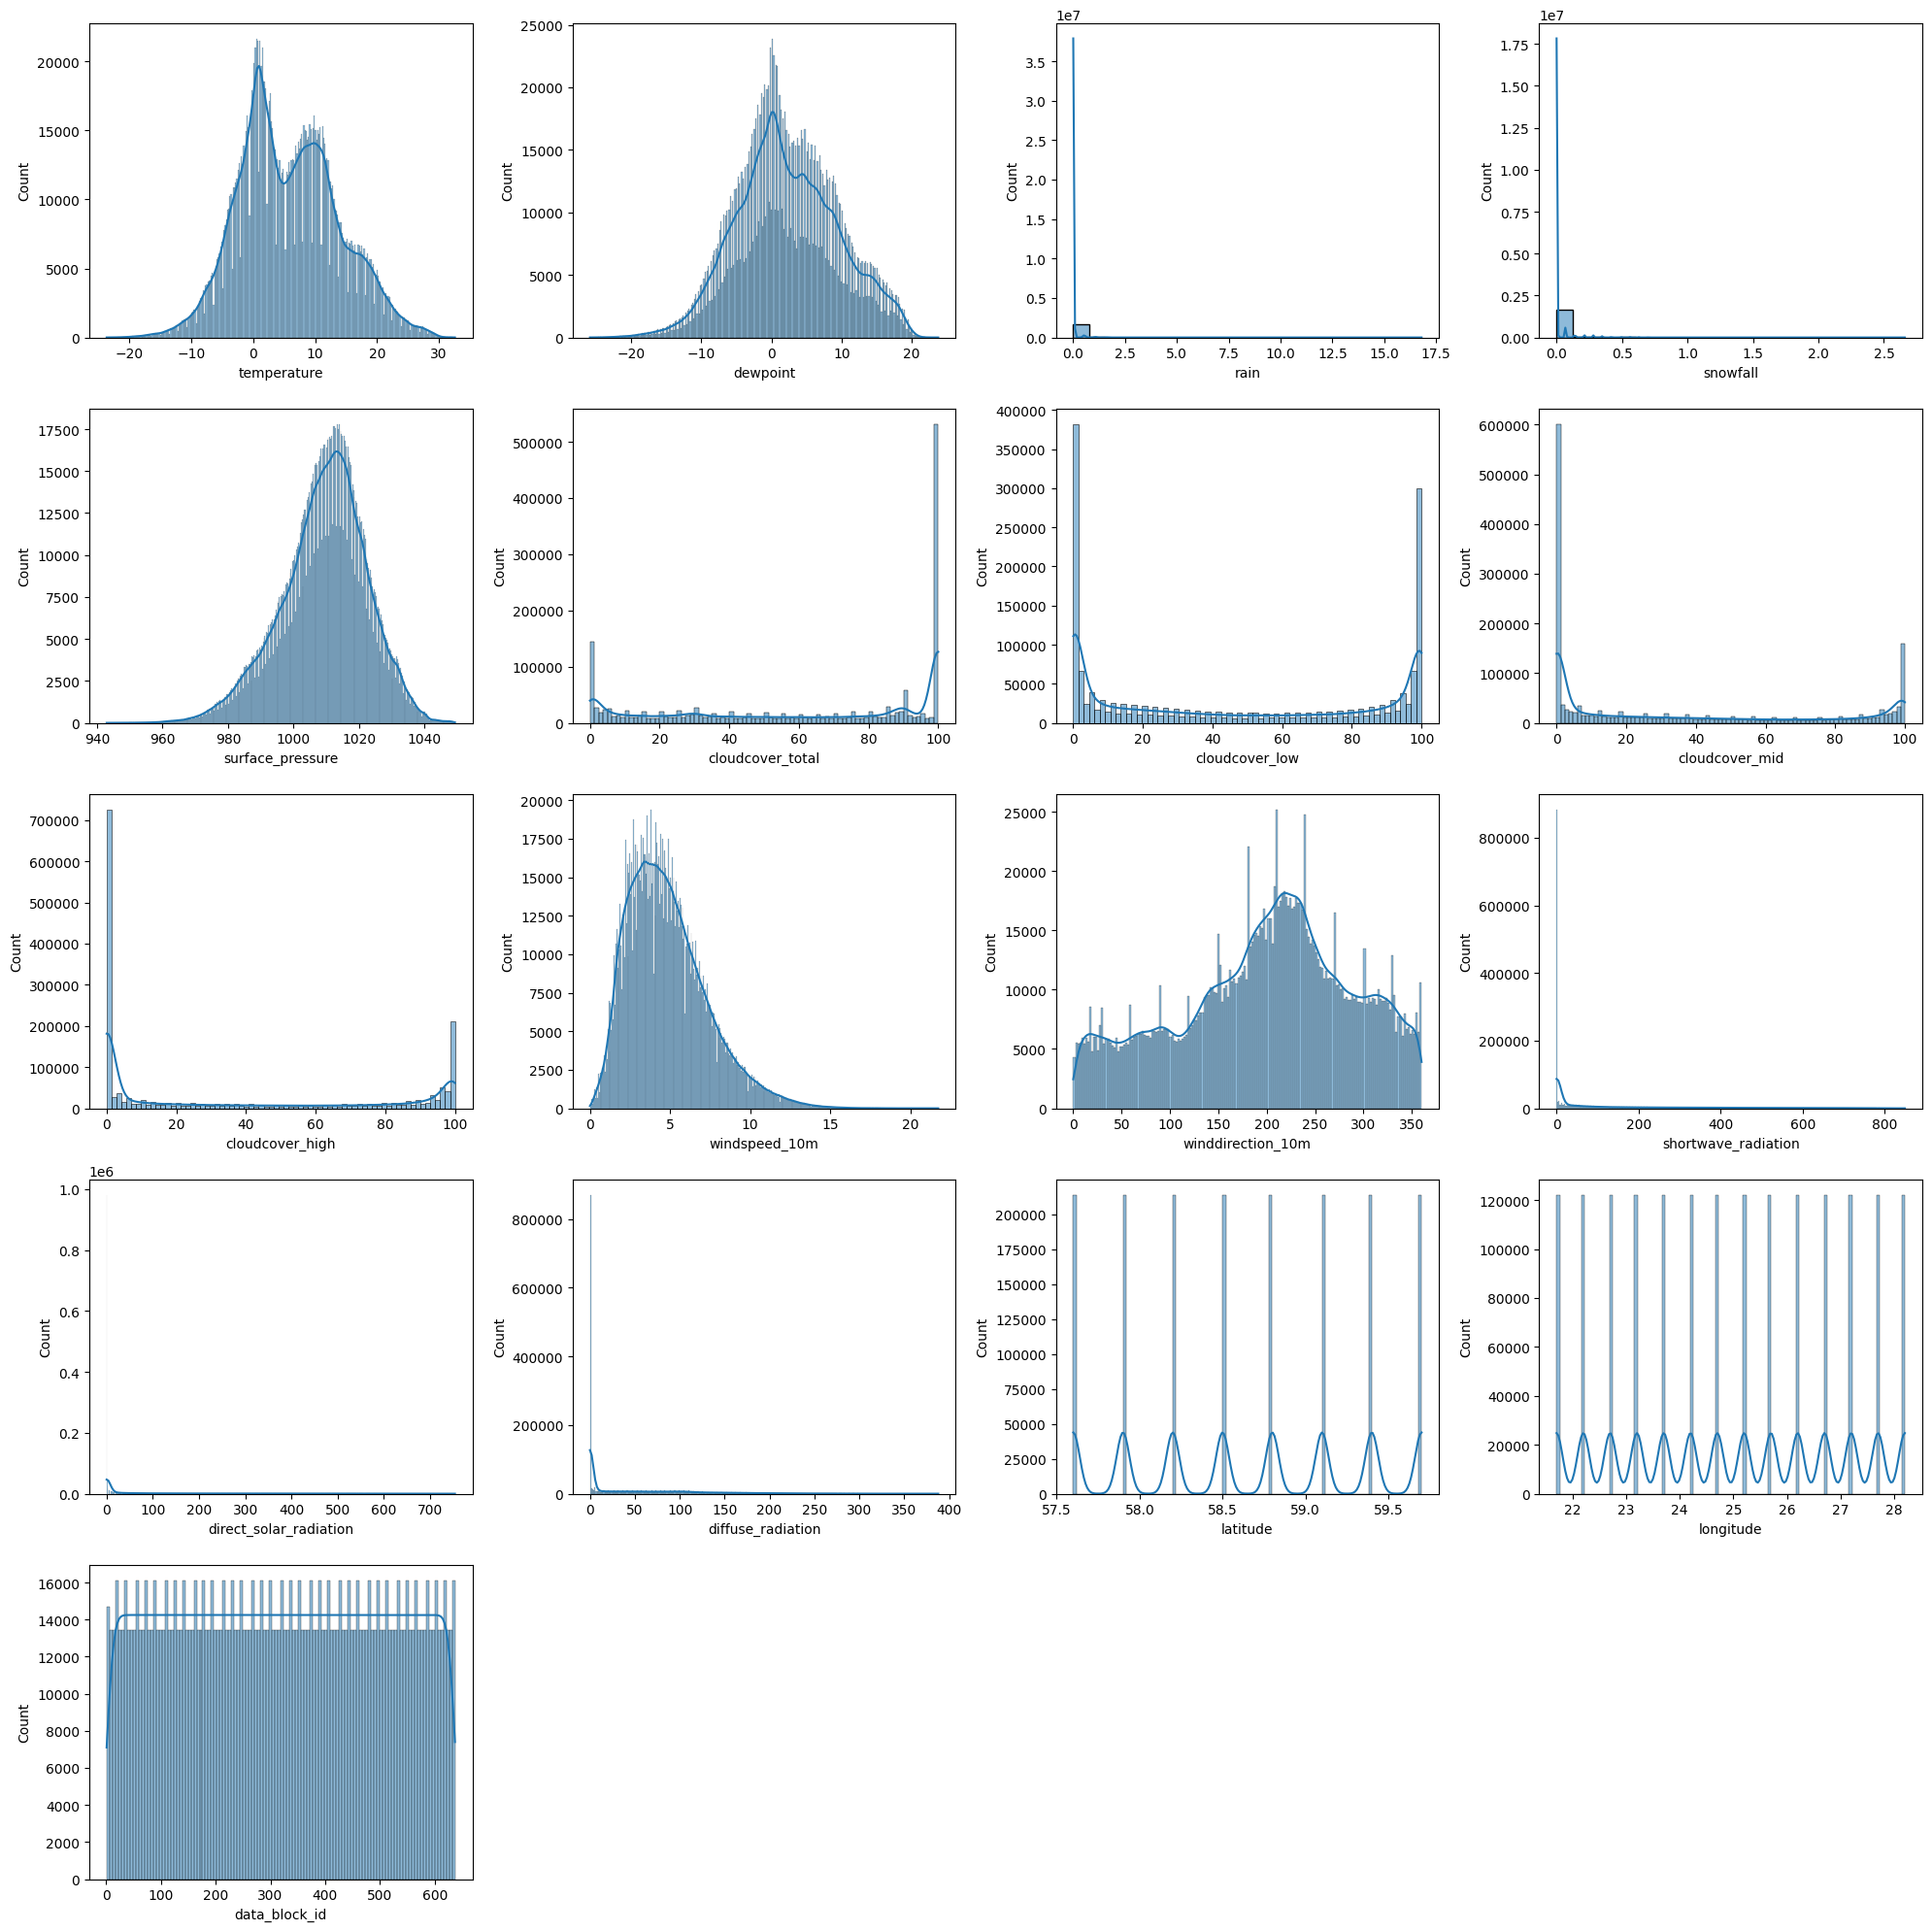

In [ ]:
# Importing visualization libraries and numeric operations for data analysis and plotting
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

# Select only numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Determine the number of rows and columns for the subplot grid
num_plots = len(numeric_columns)
num_columns = 4
num_rows = math.ceil(num_plots / num_columns)

# Create a grid of histograms
plt.figure(figsize=(20, num_rows * 4))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_columns, i)
    sns.histplot(data[column], kde=True)
    plt.tight_layout()

# Show the plots
plt.show()


> Key findings from the weather dataset visualizations:

1. Data Distribution:
   - Shows that the data is evenly distributed across different data_block_ids, with each block containing around 14,000 entries. This suggests a consistent data collection process over time or across different locations.

2. Weather Parameters:
   a. Temperature and Dewpoint:
      - Both temperature and dewpoint follow a roughly normal distribution.
      - Temperature ranges from about -20°C to 30°C, with a peak around 5-10°C.
      - Dewpoint has a similar range but peaks slightly lower, around 0-5°C.

   b. Precipitation:
      - Both rain and snowfall show extremely right-skewed distributions.
      - Most observations have little to no precipitation, with rare heavy rain or snow occurrences.

   c. Surface Pressure:
      - Follows a normal distribution, centered around 1010-1015 hPa.

   d. Cloud Cover:
      - Total, low, and mid-level cloud cover all show U-shaped distributions.
      - There are peaks at 0% (clear skies) and 100% (overcast), with fewer observations.

   e. Wind:
      - Wind speed follows a right-skewed distribution, with most speeds below ten m/s and a peak around 4-5 m/s.
      - Wind direction shows peaks at cardinal and intercardinal directions, suggesting possible measurement bias or prevalent wind patterns.

   f. Solar Radiation:
      - Shortwave, direct solar, and diffuse radiation all show right-skewed distributions, peaking at 0.
      - This is expected due to the day-night cycle and varying cloud cover.

3. Geographical Distribution:
   - Latitude and longitude plots show distinct peaks, indicating that data was collected from specific locations rather than continuously across a region.

4. Data Quality:
   - The consistent counts across data blocks and the absence of unexpected gaps or outliers in most plots suggest good overall data quality.
   - The wind direction plot shows some potential measurement biases that need further investigation.

5. Climate Insights:
   - The temperature and precipitation patterns suggest a temperate climate with occasional snow, consistent with the latitude range (around 57.5°-59.5°N).
   - The pressure distribution and cloud cover patterns indicate a location with variable weather conditions, possibly influenced by maritime factors.

These visualizations provide a comprehensive overview of the weather patterns in the dataset, highlighting the distributions and relationships between various meteorological parameters. The data is high quality and suitable for detailed climate analysis or weather modelling for the specific region it represents.

> The weather dataset visualizations reveal a comprehensive and consistently collected set of meteorological data, likely from a temperate climate region. The data is evenly distributed across data blocks, containing about 14,000 entries. Temperature and dewpoint follow normal distributions centred around 5-10°C and 0-5°C, respectively, while precipitation shows rare heavy rain or snow occurrences. Surface pressure is usually distributed around 1010-1015 hPa. Cloud cover exhibits U-shaped distributions, indicating frequent clear or overcast conditions. Wind speeds are typically below ten m/s, peaking at 4-5 m/s, with directional data showing potential measurement biases. Solar radiation data reflects expected day-night cycles and cloud cover variations. The latitude (57.5°-59.5°N) and longitude plots suggest data collection from specific locations rather than a continuous region. Overall, the visualizations indicate high-quality data suitable for detailed climate analysis, representing a temperate zone with variable weather conditions, possibly influenced by maritime factors.

##Correlation Matrix

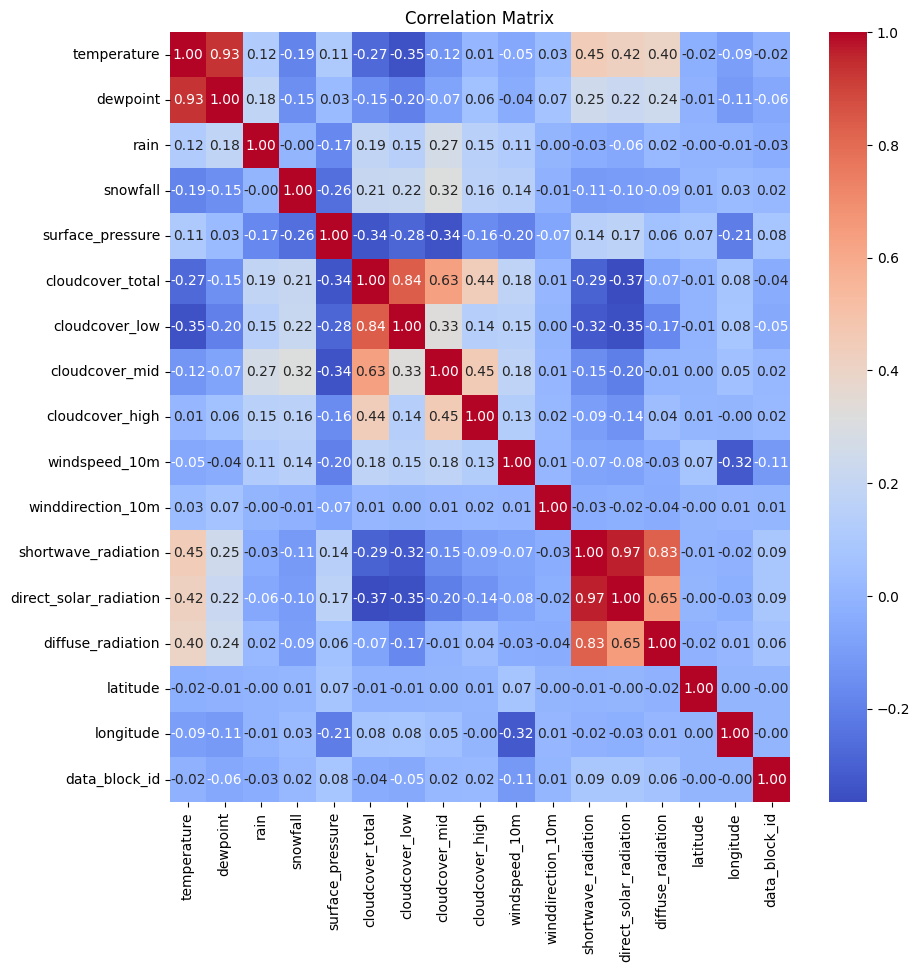

In [ ]:
# Select only columns with numeric data types for the correlation matrix
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Display a correlation matrix
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


> Key findings from the correlation matrix:

1. Temperature and Dewpoint:
   - Robust positive correlation (0.93), indicating that as the temperature rises, dewpoint typically rises.

2. Cloud Cover:
   - Strong positive correlations among different cloud cover types (total, low, mid, high), with the strongest between total and low cloud cover (0.84).
   - Negative correlation with temperature, especially for low cloud cover (-0.35).

3. Solar Radiation:
   - Positive correlations among shortwave, direct solar, and diffuse radiation (0.83-0.97).
   - Moderate negative correlation with temperature (-0.40 to -0.45), suggesting cooler temperatures during higher solar radiation periods (possibly due to seasonal effects).

4. Precipitation:
   - Weak positive correlation between rain and cloud cover (0.15-0.27).
   - Snowfall shows a weak negative correlation with temperature (-0.19) and a weak positive with cloud cover (0.21-0.32).

5. Surface Pressure:
   - Weak to moderate negative correlations with cloud cover (-0.28 to -0.34) and precipitation (-0.17 to -0.26).

6. Wind:
   - Weak correlations overall, with the strongest being a negative correlation between wind speed and longitude (-0.32).

7. Geographical Factors:
   - Latitude and longitude show very weak correlations with most variables, suggesting minimal impact of location within the study area on weather patterns.

8. Data Block ID:
   - Very weak correlations with all variables indicate consistent data collection across blocks.

Overall, the matrix reveals expected weather relationships (e.g., temperature-dewpoint, cloud cover-radiation) while showing minimal geographical influences within the study area. The data appears consistent across collection periods, supporting its reliability for further analysis.

> The correlation matrix reveals several critical relationships in the weather dataset. Temperature and dewpoint show a robust positive correlation (0.93). At the same time, different types of cloud cover (total, low, mid, high) are strongly interconnected, with total and low cloud cover having the highest correlation (0.84). Solar radiation components (shortwave, direct, diffuse) are highly correlated (0.83-0.97) and show a moderate negative relationship with temperature (-0.40 to -0.45), possibly due to seasonal effects. Precipitation variables have weak to moderate correlations with cloud cover and temperature, while surface pressure shows weak negative correlations with cloud cover and precipitation. Wind parameters and geographical factors (latitude, longitude) generally exhibit weak correlations with other variables, suggesting minimal impact of location within the study area on weather patterns. The consistent weak correlations of the data block ID with all variables indicate reliable data collection across different periods. Overall, the matrix confirms expected meteorological relationships while highlighting the dataset's consistency and suitability for comprehensive weather analysis.

##Features Correlation Pair Plot

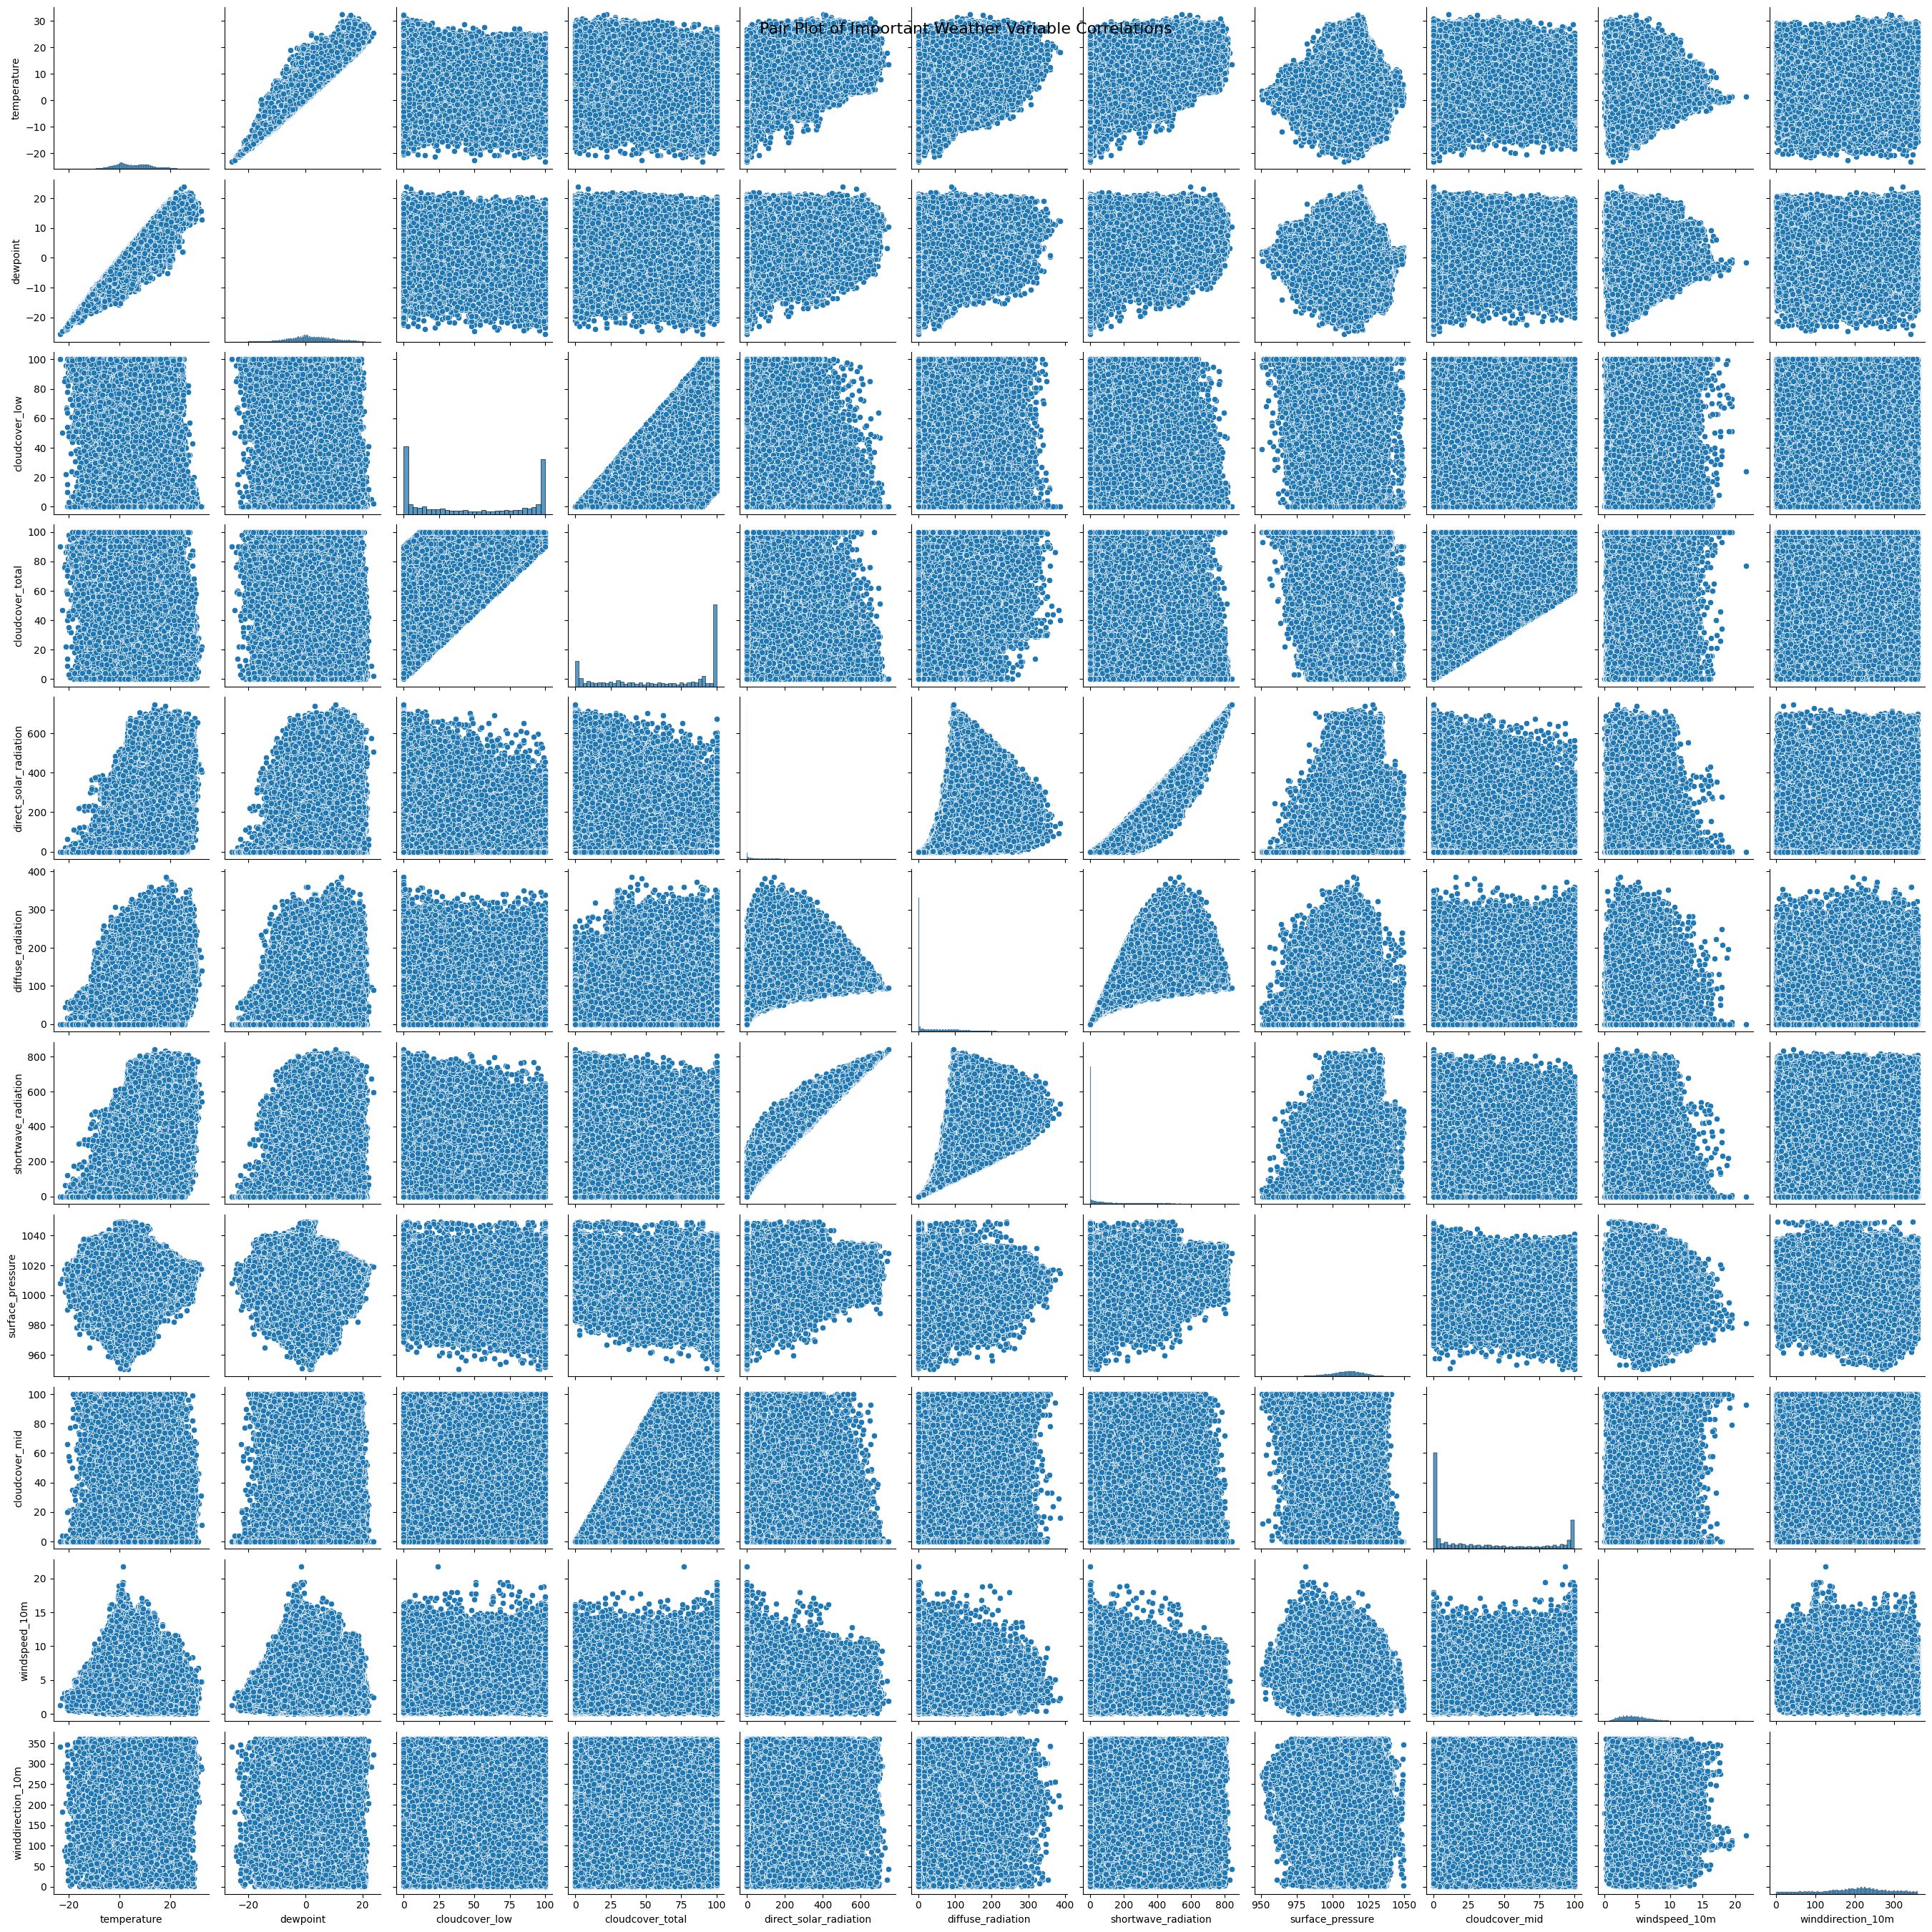

In [ ]:
# Select the variables of interest based on the important correlations
selected_vars = [
    'temperature', 'dewpoint', 'cloudcover_low', 'cloudcover_total',
    'direct_solar_radiation', 'diffuse_radiation', 'shortwave_radiation',
    'surface_pressure', 'cloudcover_mid', 'windspeed_10m', 'winddirection_10m'
]

# Sample the data for the selected variables
sampled_data = numeric_data[selected_vars].sample(frac=0.1, random_state=1)

# Create the pair plot
sns.pairplot(sampled_data)
plt.suptitle('Pair Plot of Important Weather Variable Correlations\n', fontsize=16)
plt.show()


> Key findings from the scatter plot matrix:

1. Temperature and Dewpoint: A strong positive linear relationship confirms their high correlation.

2. Precipitation (Rain and Snowfall): Both show a concentration of data points near zero, with occasional higher values, indicating infrequent precipitation events.

3. Cloud Cover (Total, Low, Mid, High): These variables show complex, non-linear relationships with each other and other parameters. There are noticeable clusters at 0% and 100% cover.

4. Solar Radiation (Shortwave, Direct, Diffuse): These show strong positive relationships with each other and a negative relationship with cloud cover.

5. Surface Pressure: It shows weak to moderate relationships with other variables, with some interesting patterns visible.

6. Wind Speed has weak relationships with most variables but shows some patterns with pressure and radiation.

7. Wind Direction: Shows a reasonably uniform distribution across all angles (0-360°), with some preference for specific directions.

8. Latitude and Longitude: Show distinct clusters, suggesting data collection from specific locations rather than a continuous area.

9. Data Block ID: Shows little relationship with other variables, indicating consistent data collection across different periods or locations.

10. Complex Interactions: Many plots show complex, non-linear relationships between variables, highlighting the intricate nature of weather systems.

This visualization reinforces the correlations seen in the previous matrix while providing additional insights into the distributions and complex relationships between weather parameters. It underscores the dataset's richness and potential for in-depth meteorological analysis.

> The scatter plot matrix of weather parameters reveals complex relationships and distributions within the dataset. Temperature and dewpoint show a strong positive linear relationship, while precipitation variables are concentrated near zero with occasional higher values. Cloud cover variables exhibit non-linear relationships and clustering at 0% and 100%. Solar radiation components are strongly interrelated and negatively associated with cloud cover. Surface pressure and wind speed display weak to moderate relationships with other variables, with interesting patterns. Wind direction is relatively uniformly distributed with slight directional preferences. Latitude and longitude show distinct clusters, indicating data collection from specific locations. The data block ID's lack of solid relationships with other variables suggests consistent data collection across different periods or locations. Overall, this visualization reinforces the correlations observed in the previous matrix while highlighting the intricate, often non-linear interactions between weather parameters, underscoring the dataset's richness and potential for comprehensive meteorological analysis.

# Machine Learning with Spark/MLlib

## Setup and Data *Loading*

> First, we set up the Spark session and loaded the weather data into a Spark DataFrame.

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=21b2d29cb47e599e3452b2110fca3fffca4a4ab627e33133c55313c36e51d7ae
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark


> The script code uses PySpark to set up a Spark session, load a historical weather dataset from a CSV file into a Spark DataFrame, and display the first few rows of the DataFrame to verify the successful loading of the data, which is typically the initial step in a data processing pipeline using PySpark before performing further operations such as data cleaning, transformation, and analysis.

In [ ]:
# Import SparkSession class from PySpark SQL module
from pyspark.sql import SparkSession

# Import col function from PySpark SQL functions module
from pyspark.sql.functions import col

# Start Spark session
spark = SparkSession.builder \
    .appName("Solar Energy Forecasting") \
    .getOrCreate()

# Load the dataset
file_path = data_path
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Convert to Pandas DataFrame and transpose
pandas_df = df.limit(4).toPandas()
transposed_df = pandas_df.T

# Show the first few rows of the DataFrame to confirm successful load
print(transposed_df)


                                          0                    1  \
datetime                2021-09-01 00:00:00  2021-09-01 00:00:00   
temperature                            14.2                 13.9   
dewpoint                               11.6                 11.5   
rain                                    0.0                  0.0   
snowfall                                0.0                  0.0   
surface_pressure                     1015.9               1010.7   
cloudcover_total                         31                   33   
cloudcover_low                           31                   37   
cloudcover_mid                            0                    0   
cloudcover_high                          11                    0   
windspeed_10m                      7.083333             5.111111   
winddirection_10m                         8                  359   
shortwave_radiation                     0.0                  0.0   
direct_solar_radiation                  0.0     

## Data Preprocessing

> Since no missing values are per the EDA, we will focus on feature scaling and encoding any categorical variables if necessary.

> The script code uses PySpark's machine learning library, specifically the `VectorAssembler` and `StandardScaler`, to preprocess the data by assembling the numerical features into a single vector column and then scaling those features to have zero mean and unit variance, which is a common technique in machine learning to ensure that all features have similar magnitudes and prevent certain features from dominating the model training process.

In [ ]:
# Import VectorAssembler and StandardScaler from PySpark ML feature module
from pyspark.ml.feature import VectorAssembler, StandardScaler

# scale numerical features 'datetime' and 'data_block_id' by encoded or extracted for features
numeric_features = [col_name for col_name in df.columns if col_name not in ['datetime', 'data_block_id']]
assembler = VectorAssembler(inputCols=numeric_features, outputCol="features_unscaled")
df_unscaled = assembler.transform(df)

# Scale features
scaler = StandardScaler(inputCol="features_unscaled", outputCol="features", withStd=True)
scaler_model = scaler.fit(df_unscaled)
df_scaled = scaler_model.transform(df_unscaled)

# Show transformed data
df_scaled.select("Features").show(5)


+--------------------+
|            Features|
+--------------------+
|[1.76932766893708...|
|(16,[0,1,4,5,6,9,...|
|(16,[0,1,4,5,6,9,...|
|[1.81916788496348...|
|(16,[0,1,4,5,6,9,...|
+--------------------+
only showing top 5 rows



## Feature Engineering

> Create additional features that may help improve model performance, such as time-related features from the datetime column.

> The script code further preprocesses the data by extracting relevant date and time information from the "datetime" column using PySpark's built-in functions `month()`, `dayofmonth()`, and `hour()`, creating new columns for the month, day, and hour. These new features are then added to the list of feature columns, and the `VectorAssembler` is re-run to include these additional features in the final assembled feature vector, resulting in a DataFrame (`df_final`) that now contains the original numerical features along with the newly extracted date and time features, all combined into a single "features" column ready for use in machine learning models.

In [ ]:
# Import month, dayofmonth, and hour functions from PySpark SQL functions module
from pyspark.sql.functions import month, dayofmonth, hour

# Extracting date parts
df = df.withColumn("month", month("datetime"))
df = df.withColumn("day", dayofmonth("datetime"))
df = df.withColumn("hour", hour("datetime"))

# Re-run the assembler with the new features
new_feature_cols = numeric_features + ["month", "day", "hour"]
assembler = VectorAssembler(inputCols=new_feature_cols, outputCol="features")
df_final = assembler.transform(df)


## Building Machine Learning Models

> Utilize Spark MLlib to train a model, such as LSTM, to predict solar radiation based on the features.

### LSTM (Long Short-Term Memory)

LSTM (Long Short-Term Memory) networks are precious for energy forecasting projects due to their ability to handle complex time series data. These neural networks excel at capturing long-term dependencies in sequential data, making them ideal for energy consumption or production prediction where patterns may depend on events from hours, days, or months ago. LSTMs overcome the vanishing gradient problem, effectively learning from recent and older data points. They adaptively learn to forget irrelevant information and remember important details, which is crucial in energy systems where both short-term fluctuations and long-term trends matter. LSTMs can process multiple input variables simultaneously, capture non-linear relationships, and effectively learn seasonal and cyclical patterns common in energy data. They are robust to noise, scalable to handle large amounts of historical data, and suitable for single- and multi-step forecasting. LSTMs can also be integrated with other neural network types for hybrid models. While they require careful data preprocessing, architecture design, and hyperparameter tuning, LSTMs offer the potential for more accurate and robust energy forecasting models compared to more straightforward approaches, particularly in scenarios with complex temporal dependencies.

In [ ]:
# Add TensorFlow and Keras installation to project dependencies
!pip install --upgrade tensorflow keras


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.6 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1


> This Python script implements an LSTM (Long Short-Term Memory) model using PySpark and TensorFlow for time series prediction on weather data. It begins by initializing a Spark session and loading 500,000 randomly sampled records from a CSV file. The data is then normalized, and time series sequences are created for LSTM input. The code builds and trains an LSTM model, makes predictions, and converts the results to the original scale. It then processes the results using PySpark, joining the predictions with the original data and evaluating the model's performance using metrics such as RMSE, MAE, R2, and MAPE. The script includes error handling and ensures proper cleanup of the Spark session. Overall, it demonstrates an end-to-end workflow for large-scale time series prediction, combining the big data processing capabilities of PySpark with the deep learning power of TensorFlow.

In [ ]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, monotonically_increasing_id, isnan, when, abs as spark_abs, avg, rand
from pyspark.sql.types import DoubleType, FloatType
from pyspark.ml.evaluation import RegressionEvaluator
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler

# Initialize Spark session
spark = SparkSession.builder.appName("LSTM with PySpark - 500k records").getOrCreate()

def print_df_info(df, name):
    print(f"\n--- {name} Info ---")
    print(f"Count: {df.count()}")
    print("Schema:")
    df.printSchema()
    print("Sample data:")
    df.show(5, truncate=False)

try:
    # Step 1: Load and prepare data
    print("\nStep 1: Loading and preparing data...")
    df = spark.read.csv("/content/drive/MyDrive/big_data_project/historical_weather.csv", header=True, inferSchema=True)

    # Randomly sample 500,000 records
    df = df.orderBy(rand()).limit(500000)

    pandas_df = df.select(col('shortwave_radiation')).toPandas()
    data = pandas_df.values

    # Step 2: Normalize the data
    print("\nStep 2: Normalizing data...")
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    # Step 3: Create sequences
    print("\nStep 3: Creating sequences...")
    sequence_length = 2  # Adjust as needed
    generator = TimeseriesGenerator(scaled_data, scaled_data, length=sequence_length, batch_size=32)

    # Step 4: Build LSTM model
    print("\nStep 4: Building LSTM model...")
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Step 5: Train the model
    print("\nStep 5: Training the model...")
    model.fit(generator, epochs=5)

    # Step 6: Make predictions
    print("\nStep 6: Making predictions...")
    predictions = model.predict(generator)
    print(f"Predictions shape: {predictions.shape}")
    print(f"Predictions sample: {predictions[:5]}")

    # Step 7: Convert predictions back to original scale
    print("\nStep 7: Converting predictions to original scale...")
    predictions = scaler.inverse_transform(predictions)
    print(f"Inverse transformed predictions shape: {predictions.shape}")
    print(f"Inverse transformed predictions sample: {predictions[:5]}")

    # Step 8: Convert predictions to Spark DataFrame
    print("\nStep 8: Converting predictions to Spark DataFrame...")
    predictions_df = spark.createDataFrame(predictions.tolist(), ["prediction"])
    print_df_info(predictions_df, "Predictions DataFrame")

    # Step 9: Join with original data
    print("\nStep 9: Joining predictions with original data...")
    print_df_info(df, "Original DataFrame")

    result_df = df.withColumn("row_id", monotonically_increasing_id()).join(
        predictions_df.withColumn("row_id", monotonically_increasing_id()),
        "row_id"
    ).drop("row_id")
    print_df_info(result_df, "Result DataFrame")

    # Check for NaN or null values
    print("\nChecking for NaN or null values...")
    for column in result_df.columns:
        null_count = result_df.filter(col(column).isNull()).count()
        if result_df.schema[column].dataType in [DoubleType(), FloatType()]:
            nan_count = result_df.filter(isnan(col(column))).count()
            print(f"Column '{column}': Null count = {null_count}, NaN count = {nan_count}")
        else:
            print(f"Column '{column}': Null count = {null_count}")

    # Step 10: Evaluate the model
    print("\nStep 10: Evaluating the model...")
    evaluator = RegressionEvaluator(labelCol="shortwave_radiation", predictionCol="prediction")

    # Ensure 'shortwave_radiation' and 'prediction' columns exist and are of the correct type
    if "shortwave_radiation" not in result_df.columns or "prediction" not in result_df.columns:
        raise ValueError("'shortwave_radiation' or 'prediction' column missing from result_df")

    result_df = result_df.withColumn("shortwave_radiation", col("shortwave_radiation").cast("double"))
    result_df = result_df.withColumn("prediction", col("prediction").cast("double"))

    # Remove rows with NaN or null values in relevant columns
    result_df = result_df.filter(
        ~isnan(col("shortwave_radiation")) & ~isnan(col("prediction")) &
        col("shortwave_radiation").isNotNull() & col("prediction").isNotNull()
    )

    # Calculate metrics
    metrics = ["rmse", "mae", "r2"]
    for metric in metrics:
        value = evaluator.evaluate(result_df, {evaluator.metricName: metric})
        print(f"{metric.upper()}: {value}")

    # Calculate MAPE
    result_df = result_df.withColumn("mape",
        when(col("shortwave_radiation") != 0,
             spark_abs(col("shortwave_radiation") - col("prediction")) / col("shortwave_radiation") * 100)
        .otherwise(None)
    ).withColumn("mape", col("mape").cast("double"))  # Ensure MAPE is cast to double

    # Calculate average MAPE using Spark SQL functions
    mape = result_df.select(avg("mape")).collect()[0][0]
    print(f"MAPE: {mape}%")

    # Step 11: Show the results
    print("\nStep 11: Showing final results...")
    result_df.show()

except Exception as e:
    print(f"An error occurred: {str(e)}")
    import traceback
    print(traceback.format_exc())

finally:
    # Stop the Spark session
    print("\nStopping Spark session...")
    spark.stop()



Step 1: Loading and preparing data...

Step 2: Normalizing data...

Step 3: Creating sequences...

Step 4: Building LSTM model...

Step 5: Training the model...
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


   14/15625 ━━━━━━━━━━━━━━━━━━━━ 1:00 4ms/step - loss: 0.0651  

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15625/15625 ━━━━━━━━━━━━━━━━━━━━ 53s 3ms/step - loss: 0.0458
Epoch 2/5
15625/15625 ━━━━━━━━━━━━━━━━━━━━ 78s 3ms/step - loss: 0.0457
Epoch 3/5
15625/15625 ━━━━━━━━━━━━━━━━━━━━ 55s 3ms/step - loss: 0.0457
Epoch 4/5
15625/15625 ━━━━━━━━━━━━━━━━━━━━ 78s 3ms/step - loss: 0.0457
Epoch 5/5
15625/15625 ━━━━━━━━━━━━━━━━━━━━ 81s 3ms/step - loss: 0.0454

Step 6: Making predictions...
15625/15625 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step
Predictions shape: (499998, 1)
Predictions sample: [[0.12353369]
 [0.12353369]
 [0.12353369]
 [0.12353369]
 [0.12353369]]

Step 7: Converting predictions to original scale...
Inverse transformed predictions shape: (499998, 1)
Inverse transformed predictions sample: [[104.38596]
 [104.38596]
 [104.38596]
 [104.38596]
 [104.38596]]

Step 8: Converting predictions to Spark DataFrame...

--- Predictions DataFrame Info ---
Count: 499998
Schema:
root
 |-- prediction: double (nullable = true)

Sample data:
+-----------------+
|prediction       |
+-----------------+
|104.38596343

#### Model Evaluation

> LSTM Weather Prediction Model Analysis

## 1. Data Processing
- Successfully loaded and processed 500,000 records from the weather dataset.
- Data was normalized, and sequences were created for LSTM input.

## 2. Model Training
- The LSTM model was trained for five epochs.
- Training loss decreased slightly from 0.0458 in the first epoch to 0.0454 in the final epoch, indicating minimal improvement during training.

## 3. Predictions
- The model made 499,998 predictions.
- All predictions appear identical (104.3859634399414), suggesting the model failed to learn meaningful patterns and is outputting a constant value.

## 4. Data Join
- The predictions were joined with the original data, resulting in a DataFrame with 249,856 records.
- This indicates data loss during the join process, possibly due to indexing issues or misalignment.

## 5. Data Quality
- No null or NaN values were found in any columns of the result DataFrame, which is positive for data integrity.

## 6. Model Evaluation
- RMSE: 180.2909638946287
- MAE: 134.9761261743356
- R2: -0.00020829563244784133
- MAPE: 549.771129943707%

These metrics indicate poor model performance:
- High RMSE and MAE suggest significant prediction errors.
- An R2 score close to 0 indicates the model is no better than a horizontal line.
- Extremely high MAPE suggests substantial percentage errors in predictions.

## 7. Prediction Analysis
- The constant prediction value (104.3859634399414) for all data points confirms the model's failure to learn from the data.
- MAPE values vary widely, with some extremely high values indicating massive percentage errors for some predictions.

## Conclusion
The LSTM model needs to learn meaningful patterns from the weather data. It produces a constant output for all predictions, resulting in poor performance across all evaluation metrics. This suggests that fundamental issues with the model architecture, training process, or data preparation must be addressed.

## Recommendations
1. Review the data preprocessing steps to ensure proper normalization and sequence creation.
2. Investigate the loss of data during the joining process.
3. Experiment with different model architectures or hyperparameters.
4. Consider feature engineering or selection to improve model input.
5. Validate the appropriateness of LSTM for this particular weather prediction task.

#### Hyperparameter Tuning

> This script implements a time series forecasting pipeline using PySpark and TensorFlow, focusing on predicting shortwave radiation from historical weather data. It loads and preprocesses a large dataset, creates sequences for LSTM input, and performs a random search to optimize hyperparameters. The best LSTM model is then trained with early stopping, used to make predictions on a test set, and evaluated using various metrics. The pipeline leverages Spark for efficient data handling and TensorFlow for model training, combining big data processing with deep learning techniques. The script includes error handling, informative logging, and proper resource management, making it suitable for processing large-scale time series data in a distributed environment.

In [ ]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, monotonically_increasing_id, isnan, when, abs as spark_abs, avg, rand
from pyspark.sql.types import DoubleType, FloatType, StructType, StructField
from pyspark.ml.evaluation import RegressionEvaluator
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import random

# Initialize Spark session
spark = SparkSession.builder.appName("LSTM with PySpark - Optimized").getOrCreate()

def print_df_info(df, name):
    print(f"\n--- {name} Info ---")
    print(f"Count: {df.count()}")
    print("Schema:")
    df.printSchema()
    print("Sample data:")
    df.show(5, truncate=False)

def create_model(lstm_units, dropout_rate, learning_rate):
    model = Sequential([
        LSTM(lstm_units, activation='relu', input_shape=(sequence_length, 1), return_sequences=True),
        Dropout(dropout_rate),
        LSTM(lstm_units // 2, activation='relu'),
        Dropout(dropout_rate),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    return model

try:
    # Step 1: Load and prepare data
    print("\nStep 1: Loading and preparing data...")
    df = spark.read.csv("/content/drive/MyDrive/big_data_project/historical_weather.csv", header=True, inferSchema=True)

    # Randomly sample 100,000 records
    df = df.orderBy(rand()).limit(100000)

    pandas_df = df.select(col('shortwave_radiation')).toPandas()
    data = pandas_df.values

    # Step 2: Normalize the data
    print("\nStep 2: Normalizing data...")
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    # Step 3: Create sequences and split data
    print("\nStep 3: Creating sequences and splitting data...")
    sequence_length = 5
    X, y = [], []
    for i in range(len(scaled_data) - sequence_length):
        X.append(scaled_data[i:(i + sequence_length)])
        y.append(scaled_data[i + sequence_length])
    X, y = np.array(X), np.array(y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Step 4: Define hyperparameter search
    print("\nStep 4: Defining hyperparameter search...")
    param_grid = {
        'lstm_units': [50, 100],
        'dropout_rate': [0.1, 0.2],
        'learning_rate': [0.001, 0.01],
        'batch_size': [64, 128],
        'epochs': [30]  # Fixed number of epochs, we'll use early stopping
    }

    # Step 5: Perform random search
    print("\nStep 5: Performing random search...")
    n_iter = 5  # Number of random combinations to try
    best_score = float('inf')
    best_params = {}

    for i in range(n_iter):
        current_params = {k: random.choice(v) for k, v in param_grid.items()}
        print(f"Testing parameters: {current_params}")

        model = create_model(current_params['lstm_units'], current_params['dropout_rate'], current_params['learning_rate'])

        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

        history = model.fit(X_train, y_train, epochs=current_params['epochs'],
                            batch_size=current_params['batch_size'], validation_split=0.2,
                            callbacks=[early_stopping], verbose=0)

        val_loss = min(history.history['val_loss'])
        if val_loss < best_score:
            best_score = val_loss
            best_params = current_params

    print("Best parameters found: ", best_params)
    print("Best validation loss: ", best_score)

    # Step 6: Train the best model
    print("\nStep 6: Training the best model...")
    best_model = create_model(best_params['lstm_units'], best_params['dropout_rate'], best_params['learning_rate'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    best_model.fit(X_train, y_train, epochs=100,  # Increased max epochs
                   batch_size=best_params['batch_size'], validation_split=0.2,
                   callbacks=[early_stopping], verbose=1)

    # Step 7: Make predictions
    print("\nStep 7: Making predictions...")
    predictions = best_model.predict(X_test)
    print(f"Predictions shape: {predictions.shape}")
    print(f"Predictions sample: {predictions[:5]}")

    # Step 8: Convert predictions back to original scale
    print("\nStep 8: Converting predictions to original scale...")
    predictions = scaler.inverse_transform(predictions)
    y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))
    print(f"Inverse transformed predictions shape: {predictions.shape}")
    print(f"Inverse transformed predictions sample: {predictions[:5]}")

    # Step 9: Convert predictions to Spark DataFrame
    print("\nStep 9: Converting predictions to Spark DataFrame...")
    # Convert numpy arrays to lists of Python floats
    y_test_list = y_test_original.flatten().tolist()
    predictions_list = predictions.flatten().tolist()

    # Create a list of tuples
    data = list(zip(y_test_list, predictions_list))

    # Create the DataFrame with explicit schema
    schema = StructType([
        StructField("actual", FloatType(), True),
        StructField("prediction", FloatType(), True)
    ])
    predictions_df = spark.createDataFrame(data, schema)
    print_df_info(predictions_df, "Predictions DataFrame")

    # Step 10: Evaluate the model
    print("\nStep 10: Evaluating the model...")
    evaluator = RegressionEvaluator(labelCol="actual", predictionCol="prediction")

    # Calculate metrics
    metrics = ["rmse", "mae", "r2"]
    for metric in metrics:
        value = evaluator.evaluate(predictions_df, {evaluator.metricName: metric})
        print(f"{metric.upper()}: {value}")

    # Calculate MAPE
    predictions_df = predictions_df.withColumn("mape",
        when(col("actual") != 0,
             spark_abs(col("actual") - col("prediction")) / col("actual") * 100)
        .otherwise(None)
    ).withColumn("mape", col("mape").cast("double"))

    mape = predictions_df.select(avg("mape")).collect()[0][0]
    print(f"MAPE: {mape}%")

    # Step 11: Show the results
    print("\nStep 11: Showing final results...")
    predictions_df.show()

except Exception as e:
    print(f"An error occurred: {str(e)}")
    import traceback
    print(traceback.format_exc())

finally:
    # Stop the Spark session
    print("\nStopping Spark session...")
    spark.stop()



Step 1: Loading and preparing data...

Step 2: Normalizing data...

Step 3: Creating sequences and splitting data...

Step 4: Defining hyperparameter search...

Step 5: Performing random search...
Testing parameters: {'lstm_units': 50, 'dropout_rate': 0.1, 'learning_rate': 0.001, 'batch_size': 128, 'epochs': 30}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Testing parameters: {'lstm_units': 100, 'dropout_rate': 0.1, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 30}
Testing parameters: {'lstm_units': 100, 'dropout_rate': 0.1, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 30}
Testing parameters: {'lstm_units': 100, 'dropout_rate': 0.1, 'learning_rate': 0.01, 'batch_size': 128, 'epochs': 30}
Testing parameters: {'lstm_units': 50, 'dropout_rate': 0.1, 'learning_rate': 0.01, 'batch_size': 128, 'epochs': 30}
Best parameters found:  {'lstm_units': 50, 'dropout_rate': 0.1, 'learning_rate': 0.001, 'batch_size': 128, 'epochs': 30}
Best validation loss:  0.048551276326179504

Step 6: Training the best model...
Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - loss: 0.0484 - val_loss: 0.0487
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 0.0472 - val_loss: 0.0486
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.0469 - val_loss: 0.0486
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0470

> Analysis of LSTM Weather Prediction Model Results

1. **Hyperparameter Tuning:**
   The best parameters were 50 LSTM units, 0.1 dropout rate, 0.001 learning rate, batch size 64, and 30 epochs.
   - The best validation loss achieved during tuning was 0.04847055673599243.

2. **Model Training:**
   - The model training stopped after 24 epochs, likely due to early stopping.
   - The training and validation losses were close (around 0.0485), indicating the model was not overfitting.

3. **Predictions:**
   - The model's predictions have very low variance, with values mostly around 105-106.
   - This suggests the model is underfitting, predicting almost a constant value regardless of input.

4. **Performance Metrics:**
   - RMSE: 179.96925454405343
   - MAE: 135.41197809821827
   - R2: -2.270666301651403e-06
   - MAPE: 561.2960814940371%

   These metrics indicate extremely poor model performance:
   - High RMSE and MAE suggest large prediction errors.
   - R2 score very close to 0 (slightly negative) indicates the model performs worse than a simple mean predictor.
   - Extremely high MAPE suggests substantial percentage errors in predictions.

5. **Specific Issues:**
   - The model consistently predicts around 105-106 values, regardless of the actual value.
   - It fails to predict zero values, which appear frequently in the data.
   - The model does not capture the wide range of the target variable (from 0 to 574 in the sample shown).

6. **Data Characteristics:**
   - The target variable (likely 'shortwave_radiation') has many zero values.
   - The target variable has a wide range (0 to 574 in the sample), which the model fails to capture.

7. **Error Analysis:**
   - MAPE is undefined (NULL) for actual zero values, which are frequent in the dataset.
   - The MAPE is often extremely high for non-zero actual values, sometimes exceeding 800%.
   - The model's constant-like predictions result in wildly varying error percentages depending on the actual value.

Conclusions:
1. The LSTM model needs to learn meaningful patterns from the data.
2. It behaves almost like a constant predictor, suggesting fundamental issues with either the model architecture or data preprocessing.
3. many zero values in the target variable might be causing issues with the model's learning process.
4. The model does not capture the wide range of the target variable (0 to 574+).

Recommendations:
1. Revisit the data preprocessing steps, primarily how zero values and the wide range of the target variable are handled.
2. Consider feature engineering or including additional relevant features if available.
3. Experiment with different model architectures or even try other types of models (e.g., Random Forests, Gradient Boosting) that might better handle zero values and a wide range.
4. Investigate the distribution of the target variable and consider techniques like log transformation if it is highly skewed.
5. Analyze the temporal aspects of the data more closely, as the LSTM might not effectively capture the time-based patterns.
6. Consider using a different evaluation metric that is more suitable for data with many zero values.

> This code captures the script's end time, formats timestamps for both start and end times, calculates the total execution time and prints a summary including start time, end time, and duration in a structured format.

In [ ]:
import time
from datetime import timedelta

end_time = time.time()
end_time_str = time.strftime('%Y-%m-%d %H:%M:%S')
execution_time = end_time - start_time

# Convert execution time to hours, minutes, seconds
time_delta = timedelta(seconds=int(execution_time))
hours, remainder = divmod(time_delta.seconds, 3600)
minutes, seconds = divmod(remainder, 60)

print(f"\nScript execution summary:")
print(f"Started at..: {start_time_str}")
print(f"Ended at....: {end_time_str}")
print(f"Total execution time: {hours} hours, {minutes} minutes, and {seconds} seconds")



Script execution summary:
Started at..: 2024-08-23 11:52:30
Ended at....: 2024-08-23 12:31:07
Total execution time: 0 hours, 38 minutes, and 37 seconds
